# Data wrangling

## Import packages

In [2]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file
pd.options.display.max_rows =10

## 1. Load The Hospital Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [3]:
# the supplied CSV data file is the raw_data directory
Patient_data = pd.read_csv('../raw_data/hospital_dataset.csv')

## 2. Explore The Data<a id='2.6_Explore_The_Data'></a>

In [4]:
#Call the info method on ski_data to see a summary of the data
Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [6]:
#check if there are duplicated rows
duplicate=sum(Patient_data.duplicated())
duplicate

0

In [7]:
#drop the columns that are definitly useless 
Patient_data = Patient_data.drop(Patient_data.columns[[0,1,10,83]], axis=1)

In [8]:
pd.set_option('display.max_columns', None)
Patient_data.head()

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,118,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,81,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


### 2.1 Check the Categorical Features

#### 2.1.1 Unique Categorical Features

In [9]:
Patient_data.select_dtypes('object').nunique()

ethnicity                6
gender                   2
icu_admit_source         5
icu_stay_type            3
icu_type                 8
apache_3j_bodysystem    11
apache_2_bodysystem     10
dtype: int64

In [10]:
df=Patient_data.select_dtypes('object')
unique_values=df.apply(lambda col: col.unique())
for i in unique_values:
    print(i)


['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
['M' 'F' nan]
['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]
['admit' 'readmit' 'transfer']
['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']
['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' nan 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological']
['Cardiovascular' 'Respiratory' 'Metabolic' 'Trauma' 'Neurologic'
 'Gastrointestinal' 'Renal/Genitourinary' nan 'Undefined diagnoses'
 'Haematologic' 'Undefined Diagnoses']


We can see that for the apache_2_bodysystem column there are two values that could be combined into one: 'Undefined diagnoses' and 'Undefined Diagnoses'. Also the most values of the 'apache_3j_bodysystem'  and 'apache_2_bodysystem' are the same. We might only need one column. 

In [11]:
# Chane the 'Undefined diagnoses' to 'Undefined Diagnoses' for column apache_2_bodysystem
Patient_data['apache_2_bodysystem'] =Patient_data['apache_2_bodysystem'].replace('Undefined diagnoses', 'Undefined Diagnoses')  

#### 2.1.2 apache_2_bodysystem VS apache_3j_bodysystem

What's the relationship between apache_2_bodysystem and apache_3j_bodysystem?

From the unique values of these two columns we can easily find out they are highly related.

In [12]:
#Calculate the number of times apache_2_bodysystem not equel to apache_3j_bodysystem
(Patient_data.apache_2_bodysystem != Patient_data.apache_3j_bodysystem).sum()

32535

Let's see what these values are

In [13]:
Patient_data.loc[Patient_data.apache_2_bodysystem != Patient_data.apache_3j_bodysystem, ['apache_2_bodysystem','apache_3j_bodysystem']]

,apache_2_bodysystem,apache_3j_bodysystem
0,Cardiovascular,Sepsis
5,Neurologic,Neurological
7,Cardiovascular,Sepsis
11,Neurologic,Neurological
12,Neurologic,Neurological
...,...,...
91697,Cardiovascular,Sepsis
91703,Cardiovascular,Sepsis
91707,NaN,NaN
91708,Cardiovascular,Sepsis


The value 'Neurologic' and 'Renal/Genitourinary' in apache_2_bodysystem is writen as 'Neurological' and 'Genitourinary' in apache_3j_bodysystem, but they are acturaly the same thing. And there are Nas in both columns.Let's see if we ignore these vlaues how many other values in these two columns are still different. And there are Nas in both columns.

In [14]:
Patient_data['apache_2_bodysystem'] =Patient_data['apache_2_bodysystem'].replace('Neurologic', 'Neurological') 
Patient_data['apache_2_bodysystem'] =Patient_data['apache_2_bodysystem'].replace('Renal/Genitourinary', 'Genitourinary')

In [15]:
a=Patient_data.loc[Patient_data.apache_2_bodysystem != Patient_data.apache_3j_bodysystem, ['apache_2_bodysystem','apache_3j_bodysystem']].dropna()
len(a)

16830

In [16]:
b=Patient_data.loc[Patient_data.apache_2_bodysystem == 'Cardiovascular', ['apache_2_bodysystem','apache_3j_bodysystem']]
unique_values1=b.apply(lambda col: col.unique())
for i in unique_values1:
    print(i)

['Cardiovascular']
['Sepsis' 'Cardiovascular' 'Genitourinary']


From the result we can see that some of the undefined diagnoses in the apache_2_bodysystem are diagnosed in the apache_3j_bodysystem column, and apache_3j_bodysystem have subdivide 'Cardiovascular' into 'Cardiovascular', 'Sepsis' and 'Genitourinary'. So we can conclude that the apache_3j_bodysystem column is more detailed and reliable than apache_2_bodysystem. So we can drop the apache_2_bodysystem but keep the apache_3j_bodysystem for later useage.

#### 2.1.3 Distribution Of Patients By Gender, Ethnicity icu_admit_source, icu_stay_type and icu_type

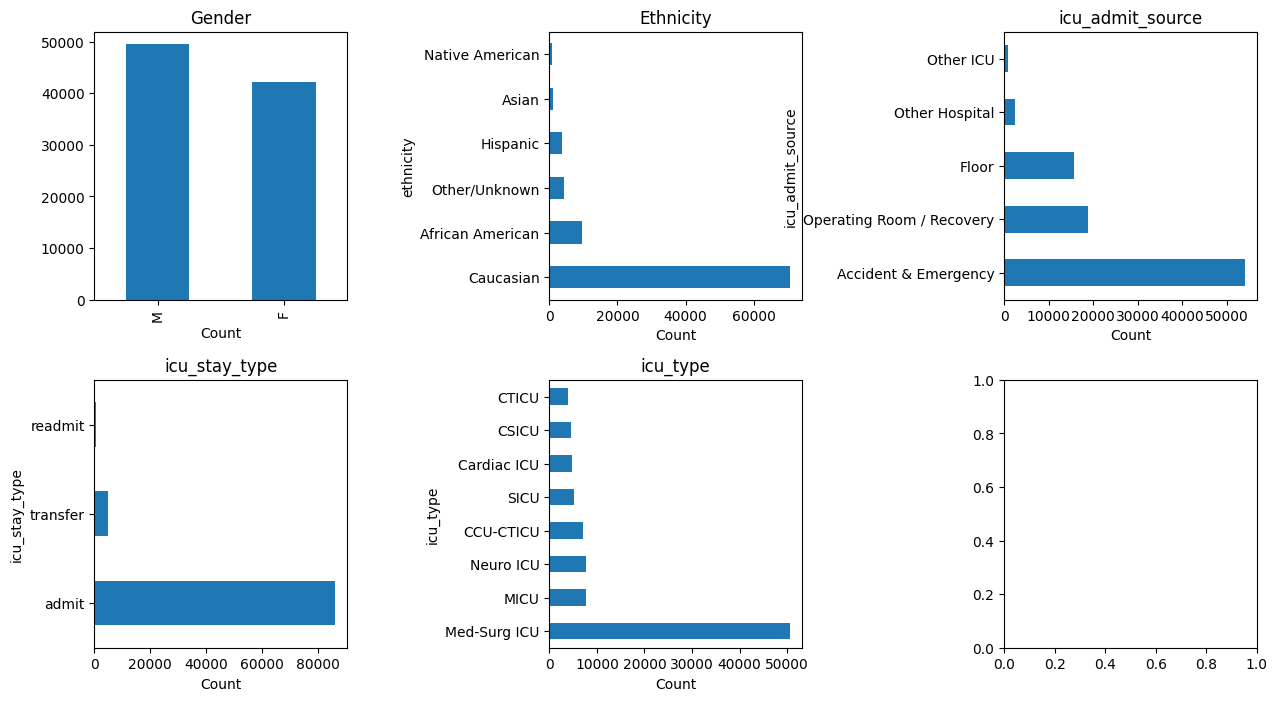

In [17]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
#Gender
Patient_data.gender.value_counts().plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('Gender')
ax[0,0].set_xlabel('Count')
#Ethnicity
Patient_data.ethnicity.value_counts().plot(kind='barh', ax=ax[0,1])
ax[0,1].set_title('Ethnicity')
ax[0,1].set_xlabel('Count')
#icu_admit_source
Patient_data.icu_admit_source.value_counts().plot(kind='barh', ax=ax[0,2])
ax[0,2].set_title('icu_admit_source')
ax[0,2].set_xlabel('Count')
#icu_stay_type
Patient_data.icu_stay_type.value_counts().plot(kind='barh', ax=ax[1,0])
ax[1,0].set_title('icu_stay_type')
ax[1,0].set_xlabel('Count')
#icu_type
Patient_data.icu_type.value_counts().plot(kind='barh', ax=ax[1,1])
ax[1,1].set_title('icu_type')
ax[1,1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.8
plt.subplots_adjust(wspace=0.8,hspace=0.3)

It looks like there are more male patients than female patients for this sample, but the distribution are resonalble. For the Ethnicity, on the other hand, the data is unbanlenced, there are way more Caucasian patients than others. Most of the icu_admit_source is coming from Accident & Emergency while the most common icu_stay_type is admit. The readmit of a patient seems to be rare, but for common sense we would infer that if a patient go to ICU more than once, the higher posiblity he/she can not survive. The most icu type is the Med-surg ICU, so in this data set the surgical/pre surgical situations account for the most of the ICU admission.

### 2.3 Numeric Features

#### 2.3.1 Numeric data summary

In [18]:
Patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
hospital_id,91713.0,105.669262,62.854406,2.000000,47.000000,109.000000,161.000000,204.00000
age,87485.0,62.309516,16.775119,16.000000,52.000000,65.000000,75.000000,89.00000
bmi,88284.0,29.185818,8.275142,14.844926,23.641975,27.654655,32.930206,67.81499
elective_surgery,91713.0,0.183736,0.387271,0.000000,0.000000,0.000000,0.000000,1.00000
height,90379.0,169.641588,10.795378,137.200000,162.500000,170.100000,177.800000,195.59000
...,...,...,...,...,...,...,...,...
immunosuppression,90998.0,0.026165,0.159628,0.000000,0.000000,0.000000,0.000000,1.00000
leukemia,90998.0,0.007066,0.083763,0.000000,0.000000,0.000000,0.000000,1.00000
lymphoma,90998.0,0.004132,0.064148,0.000000,0.000000,0.000000,0.000000,1.00000
solid_tumor_with_metastasis,90998.0,0.020638,0.142169,0.000000,0.000000,0.000000,0.000000,1.00000


#### 2.3.2 Distributions Of Feature Values

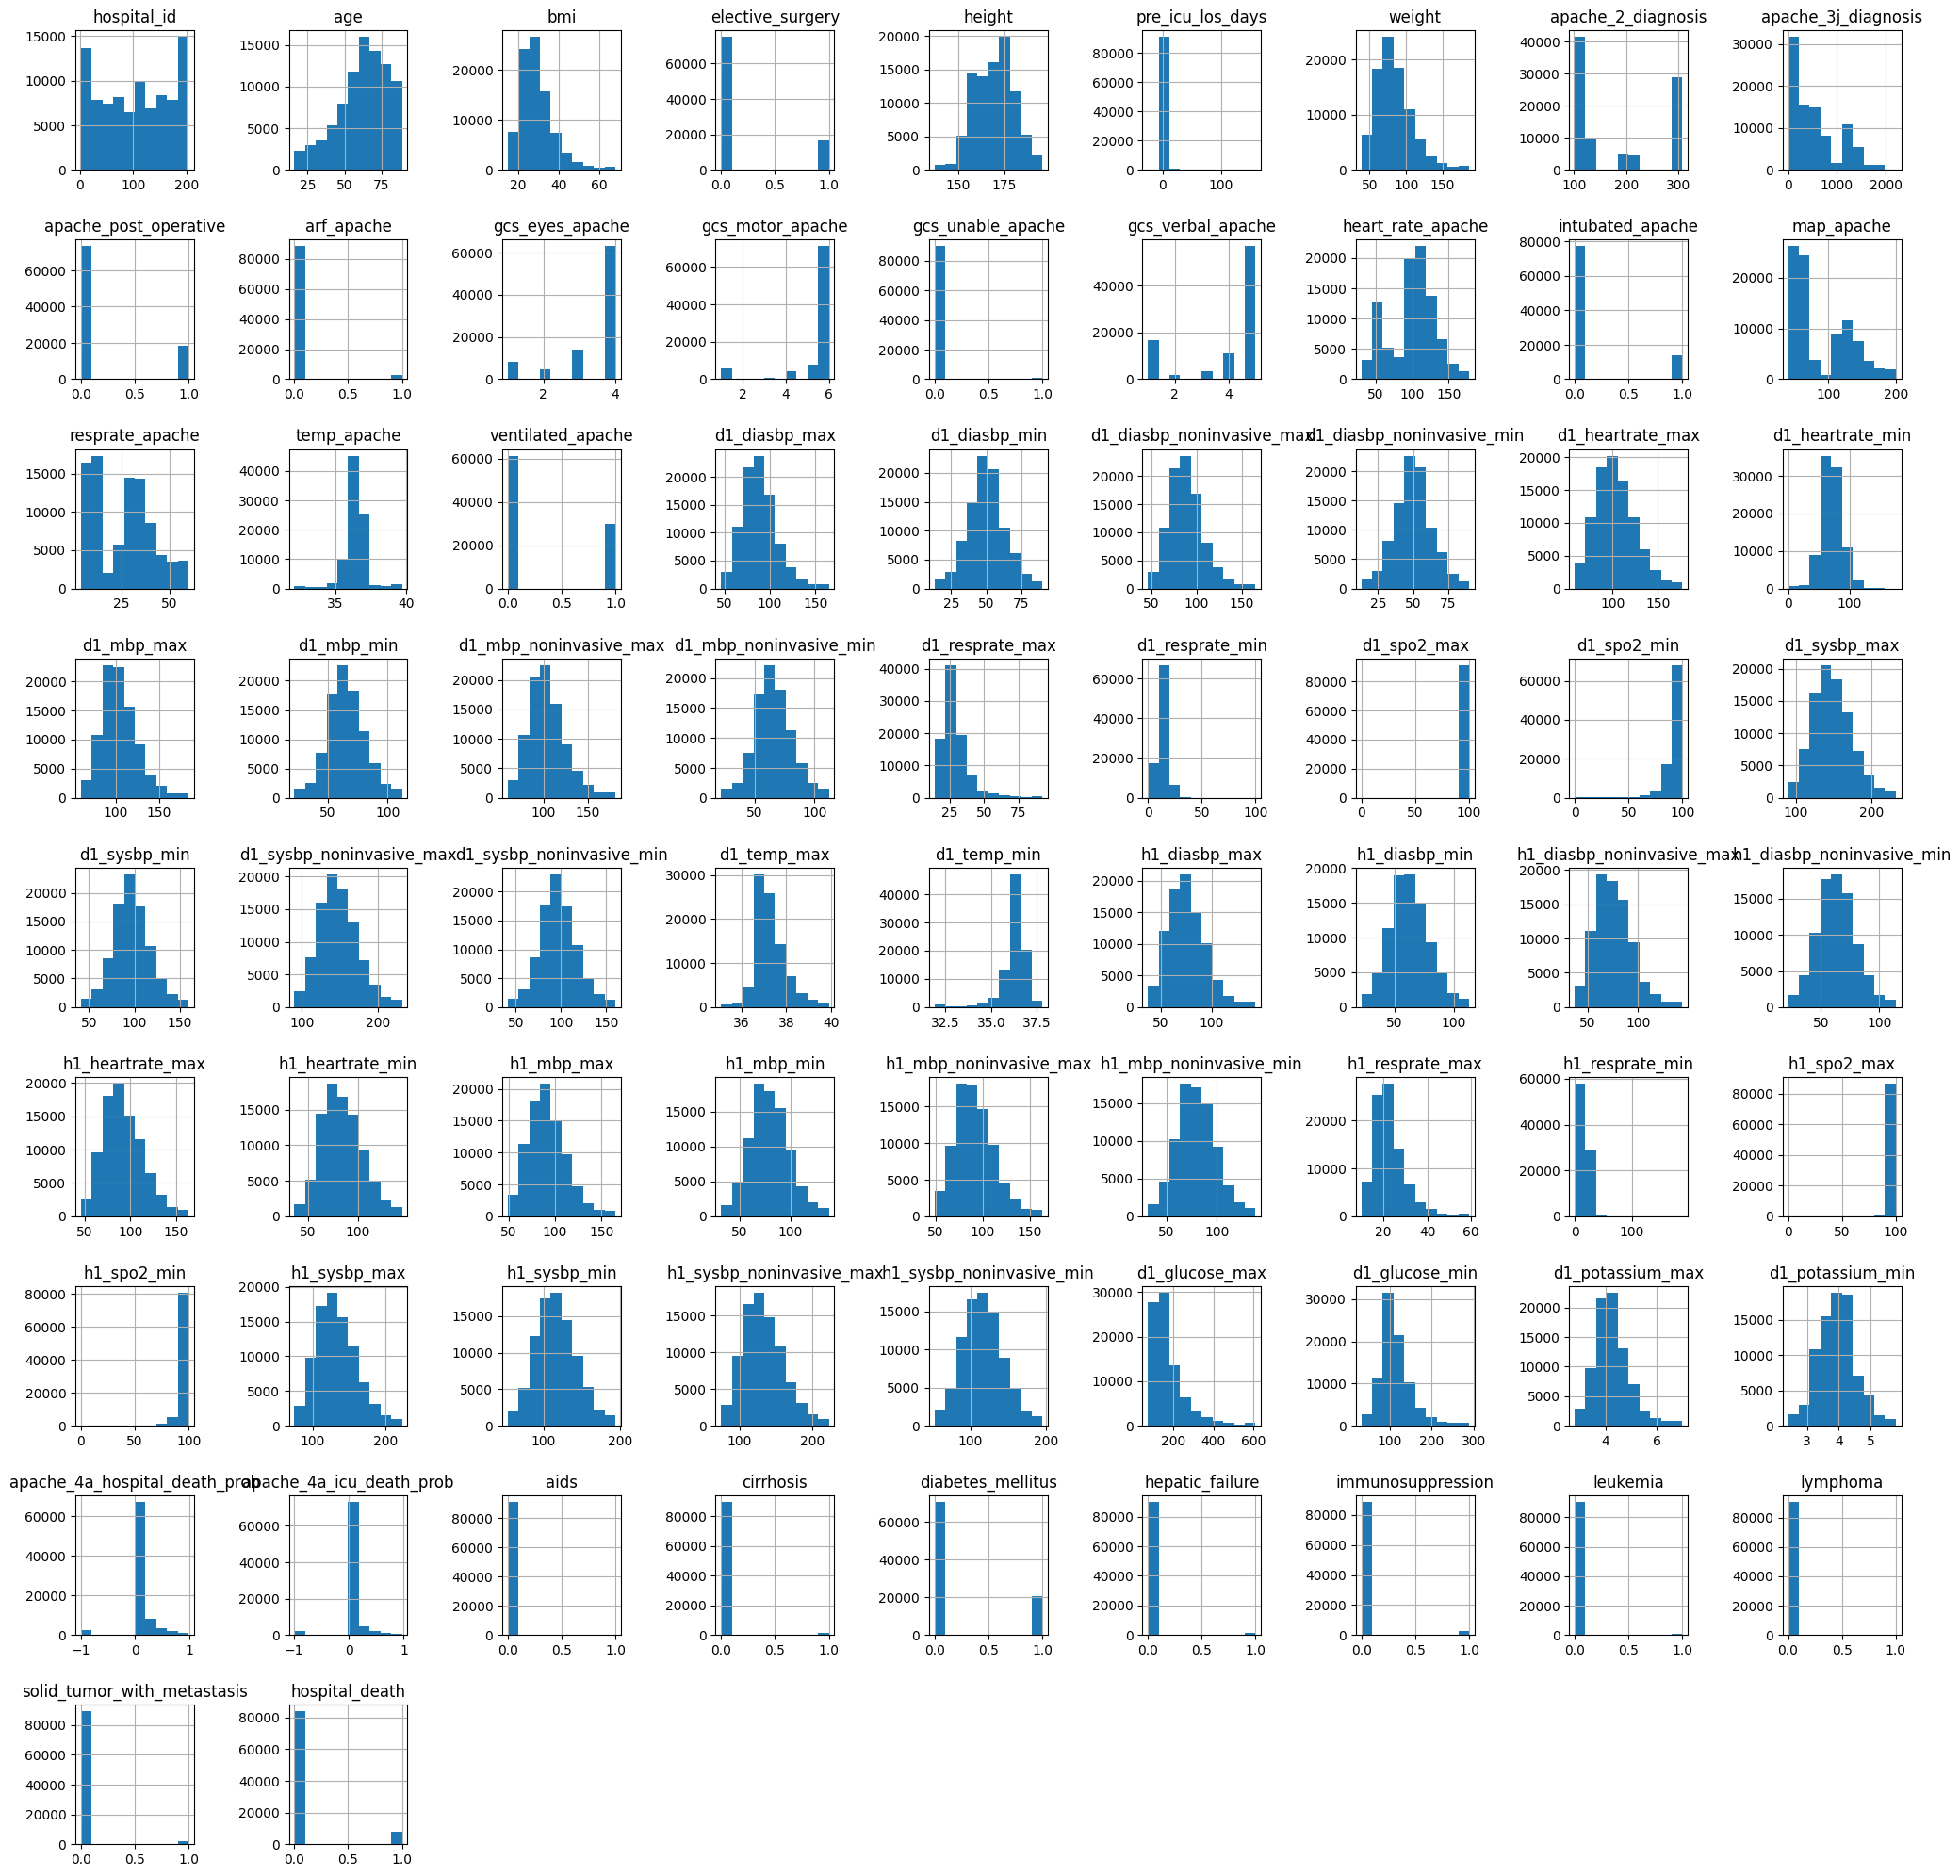

In [207]:
Patient_data.hist(figsize=(25,25))
plt.subplots_adjust(wspace=0.8,hspace=0.5);

From the distribution chart we can tell that although some of the features looks like numeric data, they are acturally categorical features, such as elective_surgery, apache_post_operative, arf_apache,ventilated_apache, intuabted_apache,aids,cirrhosis,diabetes_mellitus, hepatic_failure, immunosuppression etc. To deal with these datas we need to transform them into categorical data to be better used. 

Also, we can find that the distribution of some features look weird. There are negtive number in some colunms like: pre_icu_los_days, apach_4a_hospital_death_prob and apache_4a_icu_death_prob. And there are some skewed distributions such as h1_spo2_max, h1_spo2_min, h1_resprate_min, d1_spo2_max etc.

##### 2.3.2.1 Negative values

###### 2.3.2.1.1 pre_icu_los_days

In [19]:
#check the negative values 
Patient_data[Patient_data.pre_icu_los_days <0].head()

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
294,83,74.0,44.370252,0,Caucasian,F,149.9,Accident & Emergency,admit,Med-Surg ICU,-0.132639,99.7,110.0,104.01,0,0.0,4.0,6.0,0.0,5.0,65.0,0.0,108.0,48.0,37.7,0.0,80.0,56.0,80.0,56.0,84.0,60.0,108.0,91.0,108.0,91.0,38.0,16.0,98.0,92.0,179.0,132.0,179.0,132.0,38.2,36.7,70.0,60.0,70.0,60.0,73.0,65.0,108.0,108.0,108.0,108.0,31.0,20.0,97.0,94.0,165.0,143.0,165.0,143.0,240.0,155.0,4.5,4.5,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Cardiovascular,Cardiovascular,0
310,118,73.0,NaN,0,Caucasian,M,167.6,Accident & Emergency,admit,CCU-CTICU,-0.215278,NaN,110.0,104.01,0,0.0,4.0,6.0,0.0,5.0,94.0,0.0,67.0,38.0,36.4,0.0,79.0,59.0,79.0,59.0,94.0,78.0,94.0,67.0,94.0,67.0,37.0,14.0,98.0,90.0,117.0,83.0,117.0,83.0,36.8,36.4,79.0,79.0,79.0,79.0,94.0,82.0,91.0,91.0,91.0,91.0,31.0,19.0,93.0,92.0,112.0,112.0,112.0,112.0,182.0,182.0,4.2,4.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Cardiovascular,Cardiovascular,0
397,118,NaN,42.364193,0,Caucasian,M,167.6,Floor,admit,CCU-CTICU,-0.786806,119.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,41.0,87.0,41.0,104.0,68.0,99.0,37.0,99.0,37.0,37.0,14.0,98.0,90.0,133.0,63.0,133.0,63.0,37.0,36.1,75.0,49.0,75.0,49.0,86.0,72.0,82.0,63.0,82.0,63.0,28.0,21.0,94.0,91.0,97.0,86.0,97.0,86.0,160.0,134.0,3.8,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
576,77,NaN,27.887976,0,African American,M,175.3,Floor,readmit,Med-Surg ICU,-0.612500,85.7,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,38.0,93.0,38.0,103.0,58.0,134.0,84.0,134.0,84.0,40.0,14.0,100.0,96.0,191.0,68.0,191.0,68.0,36.9,36.3,92.0,38.0,92.0,38.0,84.0,61.0,124.0,102.0,124.0,102.0,40.0,23.0,100.0,96.0,176.0,68.0,176.0,68.0,144.0,140.0,3.7,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
707,77,NaN,33.448627,0,Caucasian,M,176.5,Operating Room / Recovery,admit,Med-Surg ICU,-0.844444,104.2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,56.0,86.0,56.0,108.0,83.0,105.0,74.0,105.0,74.0,27.0,9.0,98.0,91.0,140.0,100.0,140.0,100.0,37.4,36.4,84.0,65.0,84.0,65.0,108.0,96.0,104.0,84.0,104.0,84.0,17.0,9.0,97.0,91.0,135.0,115.0,135.0,115.0,160.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
#check the total count of negative values 
Patient_data.pre_icu_los_days[Patient_data.pre_icu_los_days <0].count()

778

pre_icu_los_days stands for the length of stay of the patient between hospital admission and ICU unit admission, it could not be negative. So we believe those negative numbers are all typo, and we convert it to positive numbers.

In [21]:
Patient_data.pre_icu_los_days[Patient_data.pre_icu_los_days <0]=Patient_data.pre_icu_los_days[Patient_data.pre_icu_los_days <0]*(-1)

/var/folders/g9/8hq0srl15_19scjm91qcc0fw0000gn/T/ipykernel_57071/2179804715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Patient_data.pre_icu_los_days[Patient_data.pre_icu_los_days <0]=Patient_data.pre_icu_los_days[Patient_data.pre_icu_los_days <0]*(-1)


###### 2.3.2.1.2  apache_4a_hospital_death_prob &apache_4a_icu_death_prob

In [22]:
#check the negative values 
Patient_data.apache_4a_hospital_death_prob[Patient_data.apache_4a_hospital_death_prob<0].head()

50    -1.0
80    -1.0
136   -1.0
292   -1.0
294   -1.0
Name: apache_4a_hospital_death_prob, dtype: float64

In [23]:
#check the negative values 
Patient_data.apache_4a_icu_death_prob[Patient_data.apache_4a_icu_death_prob <0].head()

80    -1.0
136   -1.0
230   -1.0
292   -1.0
294   -1.0
Name: apache_4a_icu_death_prob, dtype: float64

The apache_4a_hospital_death_prob stands for APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.  The apache_4a_icu_death_prob stands for the APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis. Both values should between 0-1, so the negative values should be truned to positive.

In [24]:
#turn the negative values into positive values
Patient_data.apache_4a_hospital_death_prob[Patient_data.apache_4a_hospital_death_prob<0]=Patient_data.apache_4a_hospital_death_prob[Patient_data.apache_4a_hospital_death_prob<0]*(-1)
Patient_data.apache_4a_icu_death_prob[Patient_data.apache_4a_icu_death_prob <0]=Patient_data.apache_4a_icu_death_prob[Patient_data.apache_4a_icu_death_prob <0]*(-1)

/var/folders/g9/8hq0srl15_19scjm91qcc0fw0000gn/T/ipykernel_57071/3223858609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Patient_data.apache_4a_hospital_death_prob[Patient_data.apache_4a_hospital_death_prob<0]=Patient_data.apache_4a_hospital_death_prob[Patient_data.apache_4a_hospital_death_prob<0]*(-1)
/var/folders/g9/8hq0srl15_19scjm91qcc0fw0000gn/T/ipykernel_57071/3223858609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Patient_data.apache_4a_icu_death_prob[Patient_data.apache_4a_icu_death_prob <0]=Patient_data.apache_4a_icu_death_prob[Patient_data.apache_4a_icu_death_prob <0]*(-1)


##### 2.3.2.2 Outliers

###### 2.3.2.2.1 Findout cols that have outliers

In [55]:
#subset the numerical cols
pd_numerical=Patient_data.loc[:,Patient_data.nunique()>11]
pd_numerical.drop(columns=['hospital_id'],inplace=True)

/var/folders/g9/8hq0srl15_19scjm91qcc0fw0000gn/T/ipykernel_57071/1169750353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_numerical.drop(columns=['hospital_id'],inplace=True)


In [57]:
PD_describe=pd_numerical.describe().T

In [58]:
PD_describe.head()

,count,mean,std,min,25%,50%,75%,max
age,87485.0,62.309516,16.775119,16.000000,52.000000,65.000000,75.000000,89.000000
bmi,88284.0,29.185818,8.275142,14.844926,23.641975,27.654655,32.930206,67.814990
height,90379.0,169.641588,10.795378,137.200000,162.500000,170.100000,177.800000,195.590000
pre_icu_los_days,91713.0,0.846709,2.484053,0.000000,0.037500,0.141667,0.418750,159.090972
weight,88993.0,84.028340,25.011497,38.600000,66.800000,80.300000,97.100000,186.000000


In [62]:
#calculate the upper and lower 3 sigma values for each cols
PD_describe['lower_3_sigma']=PD_describe['mean']-(3*PD_describe['std'])
PD_describe['upper_3_sigma']=PD_describe['mean']+(3*PD_describe['std'])

In [63]:
# find the cols that have a min value that more than 3 times lower than the lower_3_sigma
pd_outlier_lower=PD_describe[PD_describe.lower_3_sigma>PD_describe['min']*3]
pd_outlier_lower

,count,mean,std,min,25%,50%,75%,max,lower_3_sigma,upper_3_sigma
d1_heartrate_min,91568.0,70.321848,17.115903,0.0,60.0,69.0,81.0,175.0,18.974141,121.669556
d1_spo2_max,91380.0,99.241836,1.794181,0.0,99.0,100.0,100.0,100.0,93.859295,104.624378
d1_spo2_min,91380.0,90.454826,10.030069,0.0,89.0,92.0,95.0,100.0,60.364618,120.545034
h1_spo2_max,87528.0,98.044637,3.212934,0.0,97.0,99.0,100.0,100.0,88.405834,107.683440
h1_spo2_min,87528.0,95.174310,6.625227,0.0,94.0,96.0,99.0,100.0,75.298630,115.049990


In [64]:
#find the cols that have a max value that more than 3 times higher than the upper_3_sigma
pd_outlier_upper=PD_describe[PD_describe.upper_3_sigma*3<PD_describe['max']]
pd_outlier_upper

,count,mean,std,min,25%,50%,75%,max,lower_3_sigma,upper_3_sigma
pre_icu_los_days,91713.0,0.846709,2.484053,0.0,0.0375,0.141667,0.41875,159.090972,-6.605449,8.298868
d1_resprate_min,91328.0,12.846279,5.064943,0.0,10.0000,13.000000,16.00000,100.000000,-2.348550,28.041109
h1_resprate_min,87356.0,17.211525,6.072588,0.0,14.0000,16.000000,20.00000,189.000000,-1.006239,35.429289


###### 2.3.2.2.2 drop rows that have outliers for some cols

In [65]:
#drop rows have lower outliers that more than 3 times lower than the lower_3_sigma
Patient_data=Patient_data[Patient_data.d1_heartrate_min>6]
Patient_data=Patient_data[Patient_data.d1_spo2_max>31]
Patient_data=Patient_data[Patient_data.d1_spo2_min>20]
Patient_data=Patient_data[Patient_data.h1_spo2_max>27]
Patient_data=Patient_data[Patient_data.h1_spo2_min>25]

In [66]:
#drop rows have upper outliers that 3 times higher than the upper_3_sigma value
Patient_data=Patient_data[Patient_data.d1_resprate_min<84]
Patient_data=Patient_data[Patient_data.h1_resprate_min<105]
Patient_data=Patient_data[Patient_data.pre_icu_los_days<24]

### 2.3 Missing values 

#### 2.3.1 Count the number of missing values in each column and sort them.

In [67]:
pd.set_option('display.max_rows', None)
#Count the number of missing values in each column and sort them.
missing = pd.concat([Patient_data.isnull().sum(), 100 * Patient_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing

,count,%
hospital_id,0,0.000000
age,3878,4.575811
bmi,2958,3.490265
elective_surgery,0,0.000000
ethnicity,1189,1.402950
gender,13,0.015339
height,1066,1.257817
icu_admit_source,91,0.107375
icu_stay_type,0,0.000000
icu_type,0,0.000000


In [68]:
#check the missing values by row
missing_row = pd.concat([Patient_data.isnull().sum(axis=1), 100 * Patient_data.isnull().mean(axis=1)], axis=1)
missing_row.columns=['count', '%']
missing_row.sort_values(by='count', ascending=False).head(10)

,count,%
18389,40,49.382716
30934,38,46.913580
41454,38,46.913580
45096,38,46.913580
63422,38,46.913580
39703,38,46.913580
28517,38,46.913580
6468,38,46.913580
17299,38,46.913580
27957,38,46.913580


we have 81 features for each patient, if the missing value of a patient is more than 20% of the total features, to be more precise I believe we should drop them but not fill the NAs.

In [69]:
missing_row[missing_row['%']>=20]['count'].unique()

array([17, 19, 26, 28, 21, 32, 34, 30, 18, 27, 38, 22, 29, 20, 23, 31, 40,
       33, 25])

In [70]:
Patient_data = Patient_data[Patient_data.isnull().sum(axis=1) < 17]

In [72]:
Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84026 entries, 0 to 91712
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_id                    84026 non-null  int64  
 1   age                            80783 non-null  float64
 2   bmi                            81118 non-null  float64
 3   elective_surgery               84026 non-null  int64  
 4   ethnicity                      82852 non-null  object 
 5   gender                         84013 non-null  object 
 6   height                         82989 non-null  float64
 7   icu_admit_source               83941 non-null  object 
 8   icu_stay_type                  84026 non-null  object 
 9   icu_type                       84026 non-null  object 
 10  pre_icu_los_days               84026 non-null  float64
 11  weight                         81699 non-null  float64
 12  apache_2_diagnosis             83262 non-null  floa

There are some feature have missing values, but we will keep them here for now and will dealing with these missing values after split the training and test set

In [79]:
import copy
Patient_data_clean=Patient_data.copy()

### 2.4 Review distributions

/var/folders/g9/8hq0srl15_19scjm91qcc0fw0000gn/T/ipykernel_57071/2124520428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_numerical_1.drop(columns=['hospital_id'],inplace=True)


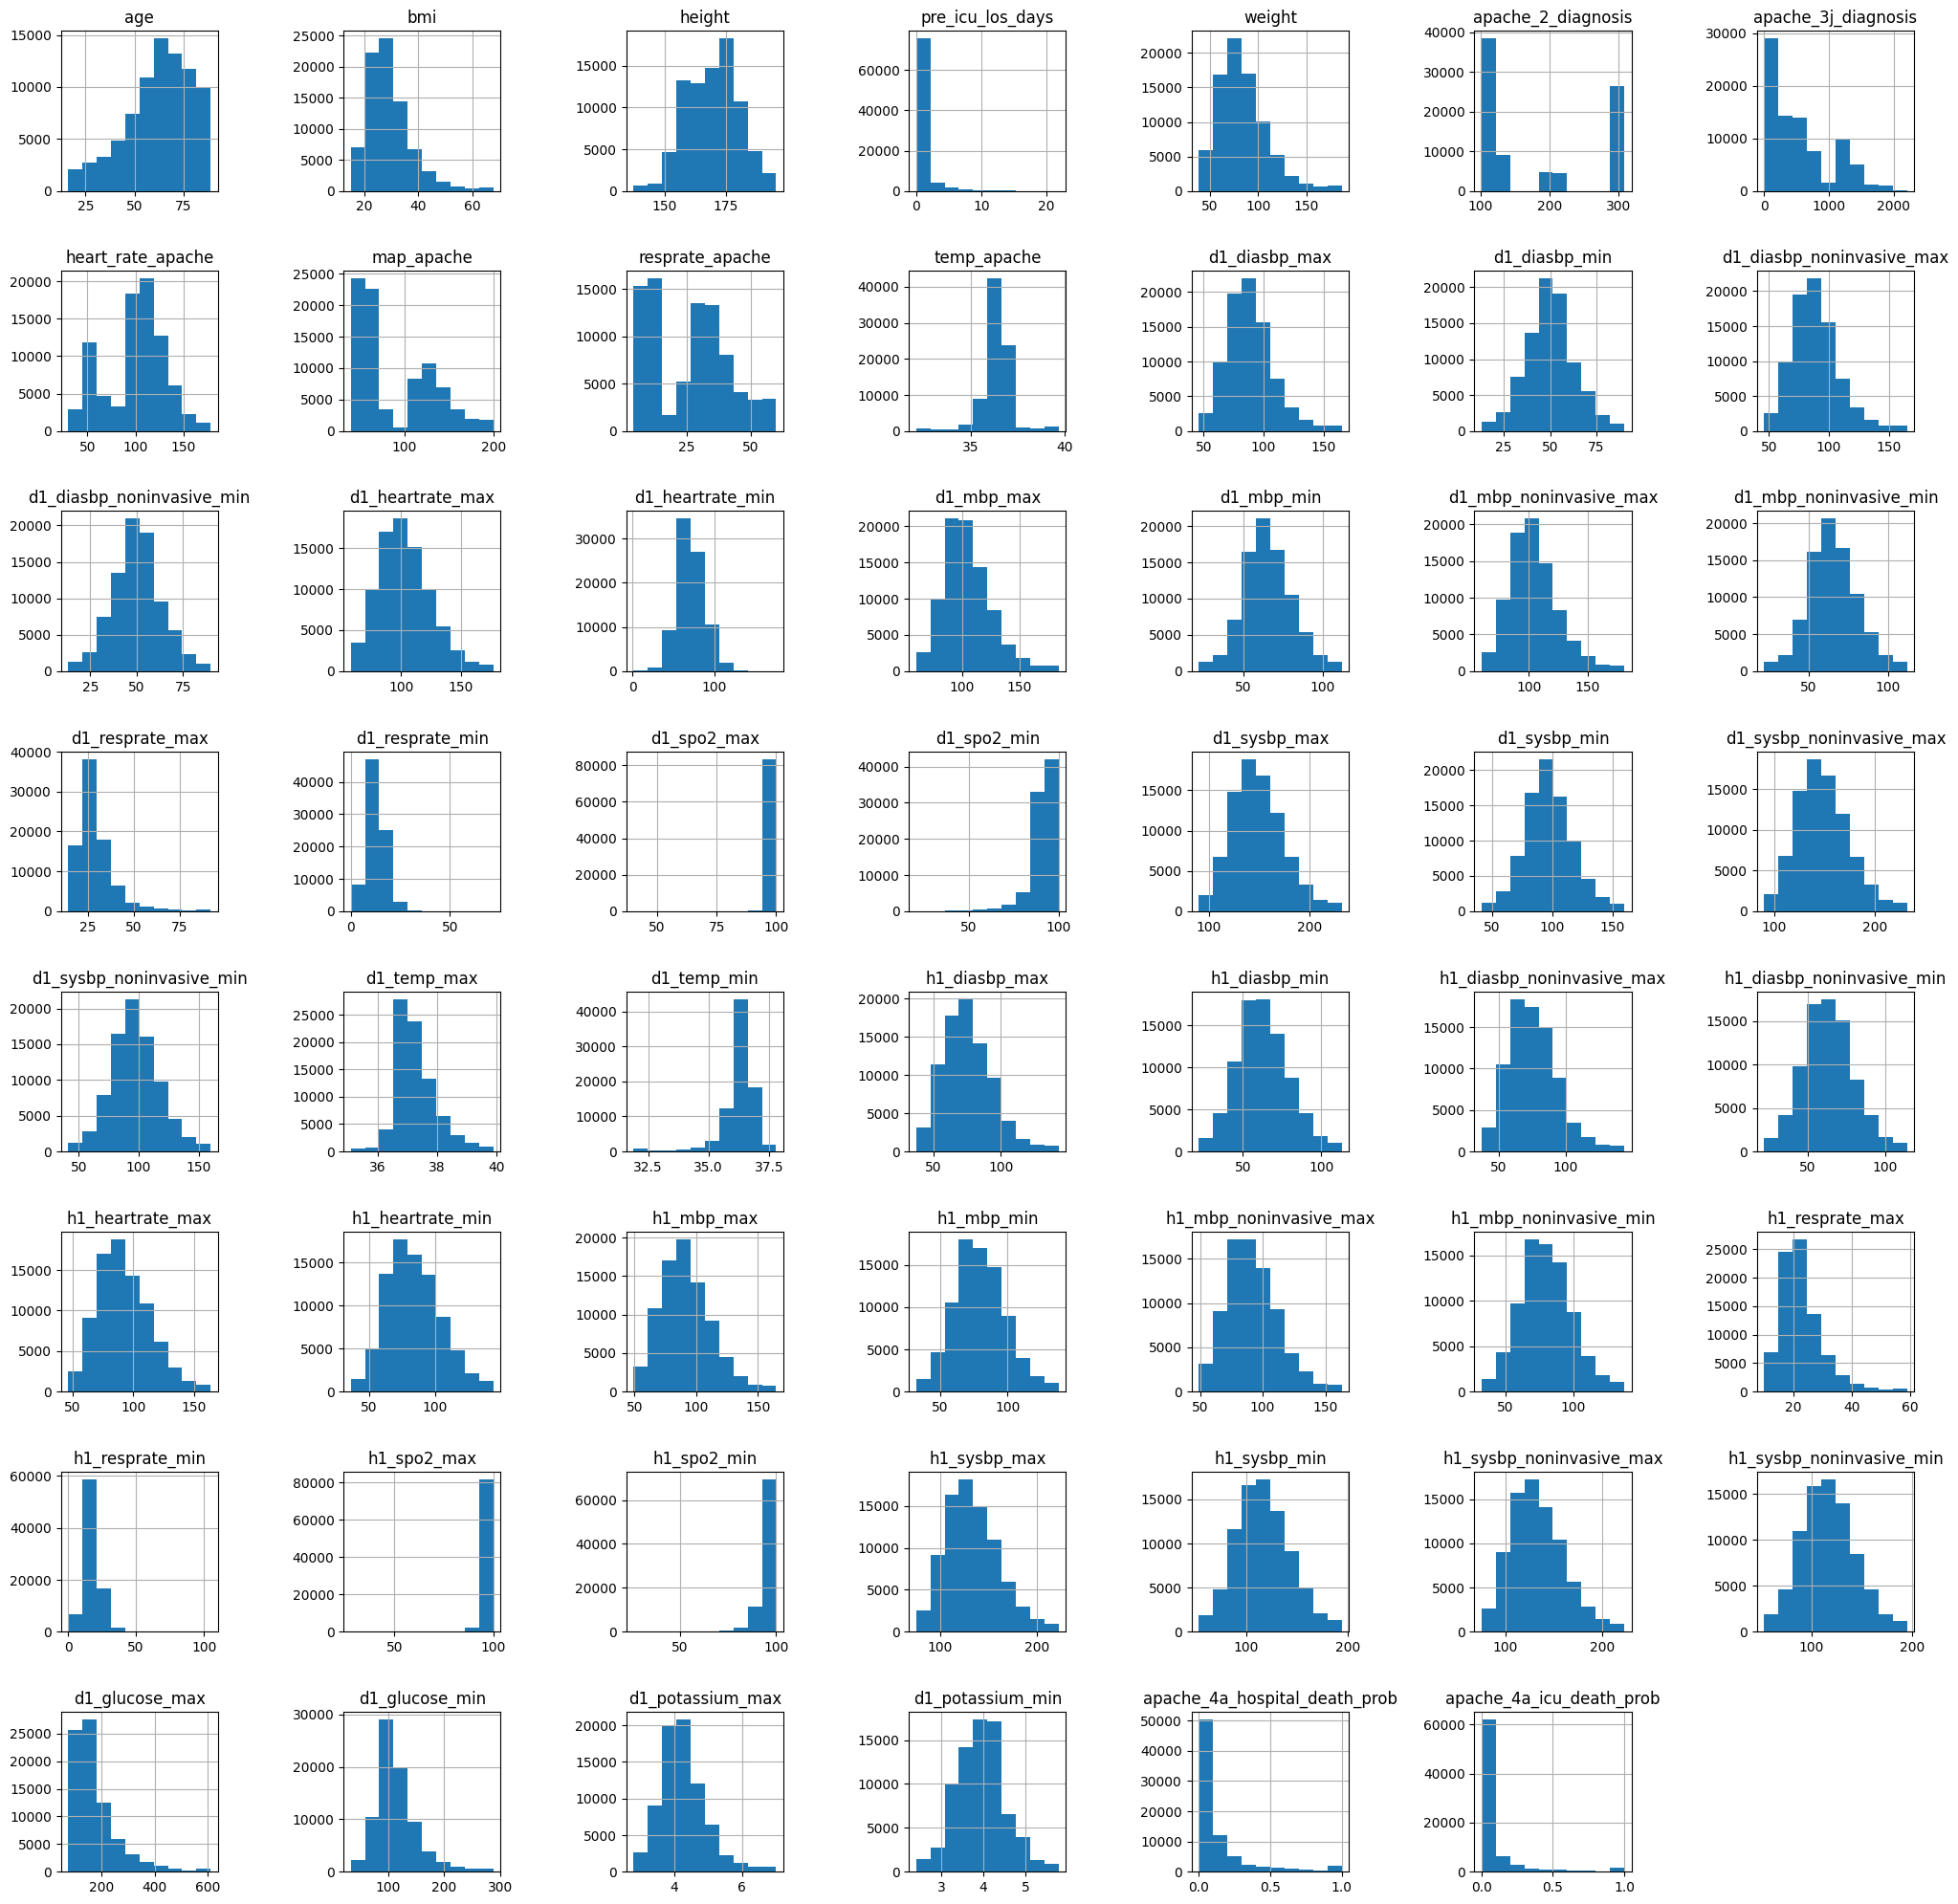

In [82]:
#check the distribution of the numerical data again
pd_numerical_1=Patient_data_clean.loc[:,Patient_data_clean.nunique()>11]
pd_numerical_1.drop(columns=['hospital_id'],inplace=True)
pd_numerical_1.hist(figsize=(25,25))
plt.subplots_adjust(wspace=0.8,hspace=0.5)

After dealing with NAs and outliers, I want to check if the distributions of numerical data looks better. There are still some skewed distributions, but better.

### 2.5 Target Feature

Finally, I want to check the target variable: hospital_death  

In [83]:
#firstly let's check the unique values of hospital_death  
Patient_data_clean.hospital_death.value_counts()

hospital_death
0    77198
1     6828
Name: count, dtype: int64

The targe variable is supper skewed.

#### 2.5.1 Death rate by apache_3j_bodysystem

I want to check if there are differences among different apache_3j_bodysystem categories in terms of hospital death rate.

In [84]:
death_by_ap3j = Patient_data_clean.loc[Patient_data.hospital_death==1].groupby('apache_3j_bodysystem')['hospital_death'].count()
deathrate_by_ap3j = death_by_ap3j/Patient_data_clean.groupby('apache_3j_bodysystem')['hospital_death'].count()
deathrate_by_ap3j=deathrate_by_ap3j.to_frame()
deathrate_by_ap3j=deathrate_by_ap3j.reset_index()
deathrate_by_ap3j.rename(columns={'hospital_death':'hospital_death_rate'}, inplace=True)
deathrate_by_ap3j.sort_values('hospital_death_rate')

,apache_3j_bodysystem,hospital_death_rate
3,Gynecological,0.006803
5,Metabolic,0.015084
6,Musculoskeletal/Skin,0.042056
2,Genitourinary,0.055528
10,Trauma,0.062981
1,Gastrointestinal,0.068891
0,Cardiovascular,0.073936
7,Neurological,0.075398
4,Hematological,0.079174
8,Respiratory,0.108742


From the result above we can see that the Cardiovascular accounts for most of the ICU admission while the Sepsis accounts for the highest death rate of the ICU admissions, following with the Respiratory, these two have a death rate higher than 10%. The smallest portion of the ICU admissions are Patients that being categoried as Gynecological by apache_3j_bodysystem, and the death rate for this category is the smallest as well.

In [85]:
Patient_data_clean['hospital_death_str']=Patient_data_clean['hospital_death'].astype(str)
Patient_data_clean.head()

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,hospital_death_str
0,118,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,0
1,81,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,0
2,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,0
3,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,0
5,83,67.0,27.56,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,0.000694,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurological,0,0


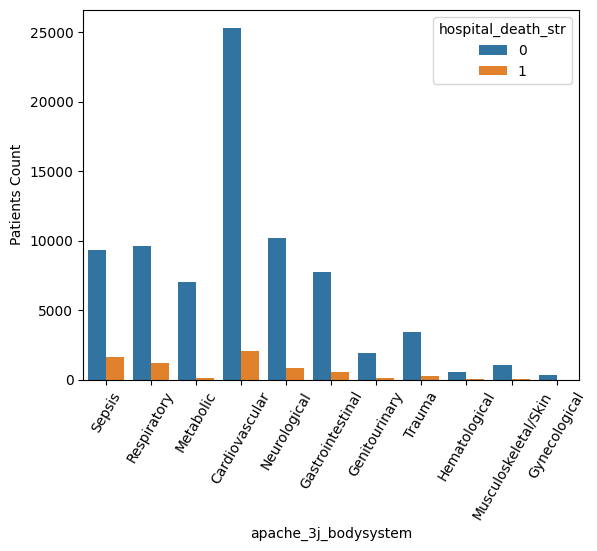

In [86]:
Patient_data_clean['hospital_death_str']=Patient_data_clean['hospital_death_str'].astype(str)
sns.countplot(data=Patient_data_clean,x='apache_3j_bodysystem',hue='hospital_death_str')
plt.xlabel('apache_3j_bodysystem')
plt.ylabel('Patients Count')
plt.xticks(rotation=60)
plt.show()

#### 2.5.2 Death rate by gender

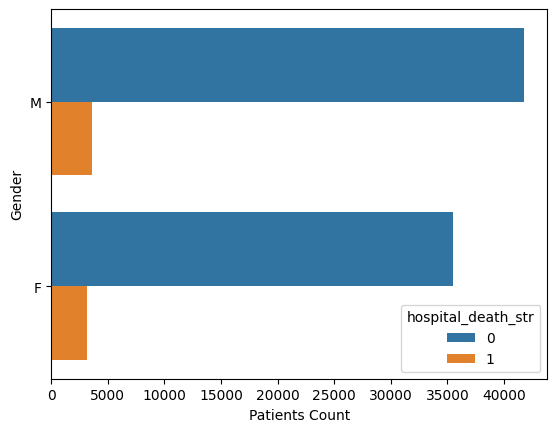

In [87]:
#check if there are difference between gender
sns.countplot(y='gender',data=Patient_data_clean, hue='hospital_death_str')
plt.xlabel('Patients Count')
plt.ylabel('Gender')

plt.show()


There is no big difference of patient outcome in terms of gender.

#### 2.5.3 Death rate by age groups

In [88]:
print(Patient_data_clean.age.min())
print(Patient_data_clean.age.max())

16.0
89.0


Text(0, 0.5, 'AgeGroup')

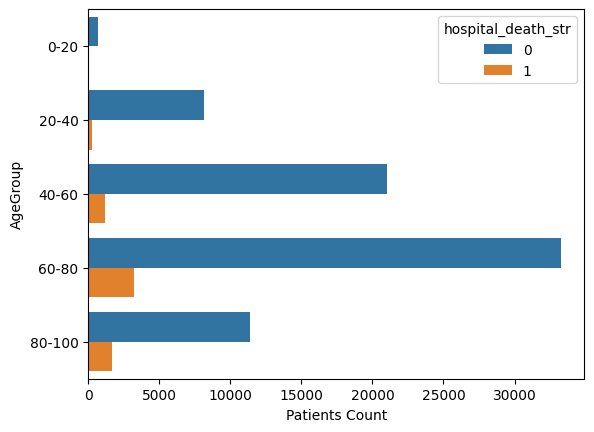

In [89]:
#check if there are difference between age
bins= [0,20,40,60,80,100]
labels = ['0-20','20-40','40-60','60-80','80-100']
Patient_data_clean['AgeGroup'] = pd.cut(Patient_data_clean['age'], bins=bins, labels=labels, right=False)

sns.countplot(y='AgeGroup',data=Patient_data_clean, hue='hospital_death_str')
plt.xlabel('Patients Count')
plt.ylabel('AgeGroup')

In [90]:
death_by_agegroup= Patient_data_clean[Patient_data_clean.hospital_death==1].groupby('AgeGroup')['hospital_death'].value_counts()
deathrate_by_agegroup = death_by_agegroup/Patient_data_clean.groupby('AgeGroup')['hospital_death'].count()
deathrate_by_agegroup=deathrate_by_agegroup.to_frame()

deathrate_by_agegroup_reset = deathrate_by_agegroup.reset_index()
deathrate_by_agegroup_reset.columns = ['Age_group','Hospital_death','hospital_death_rate']
deathrate_by_agegroup_reset=deathrate_by_agegroup_reset.loc[:,['Age_group','hospital_death_rate']]
deathrate_by_agegroup_reset.sort_values('hospital_death_rate')

/var/folders/g9/8hq0srl15_19scjm91qcc0fw0000gn/T/ipykernel_57071/3391563969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_by_agegroup= Patient_data_clean[Patient_data_clean.hospital_death==1].groupby('AgeGroup')['hospital_death'].value_counts()
/var/folders/g9/8hq0srl15_19scjm91qcc0fw0000gn/T/ipykernel_57071/3391563969.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deathrate_by_agegroup = death_by_agegroup/Patient_data_clean.groupby('AgeGroup')['hospital_death'].count()


,Age_group,hospital_death_rate
0,0-20,0.028409
1,20-40,0.033314
2,40-60,0.053489
3,60-80,0.087800
4,80-100,0.127287


No doubt the death rate increase as age goes up.

So far I just check these three features and I will look into the relationship between target variable and other features in next step.

In [91]:
Patient_data_cleaned=Patient_data_clean.drop('hospital_death_str', axis=1)

## 2.6 Save data

In [92]:
Patient_data_cleaned.shape

(84026, 82)

Save this to data directory, separately. 

In [94]:
# save the data to a new csv file
datapath = '../data'
save_file(Patient_data_cleaned, 'Patient_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/Patient_data_cleaned.csv"


## 2.7 Summary

The original number of rows for the data is 91713, and it have 85 columns, but there are columns that contains missing values.
I dropped some useless columns.
Then I investigate categorical data and numerical data separately. 
I filtered out outliers and set a threshold that if the min value/max value of the columns is 3 times less/larger than the 3-sigma value, I identify it as outlier and dropped it.
For missing values, I dropped rows that have more than 20% missing values.
I left the rest missing values for now and will fill them later after train/test split to avoid data leakage. 